# Importing necessary libraries



In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading the dataset

In [2]:
df = pd.read_csv("/content/Phishing Data.csv")
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1


# Finding null values if any

In [3]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [4]:
print("Total Null values count: ",df.isnull().sum().sum())

Total Null values count:  0


# Removing duplicates from the dataset

In [5]:
df.duplicated().sum()

740

In [6]:
df.drop_duplicates(inplace=True)
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1
2440,1,-1,1,0,1,-1,0,0,1,1,...,1,1,1,1,0,-1,0,1,1,1
2441,0,-1,0,0,0,-1,-1,1,1,0,...,0,0,-1,0,0,-1,0,0,0,1
2443,0,-1,0,0,0,-1,0,0,-1,1,...,1,1,0,1,1,-1,0,1,1,1


# Splitting the dataset into training data and testing data

*   where, x = all independent variables 
*          y = dependent variable (target variable)



In [7]:
x = df.drop('Result',axis=1)
y = df['Result']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1201, 30)
(515, 30)
(1201,)
(515,)


# Plotting the correlation matrix to identify the correlated variables/features

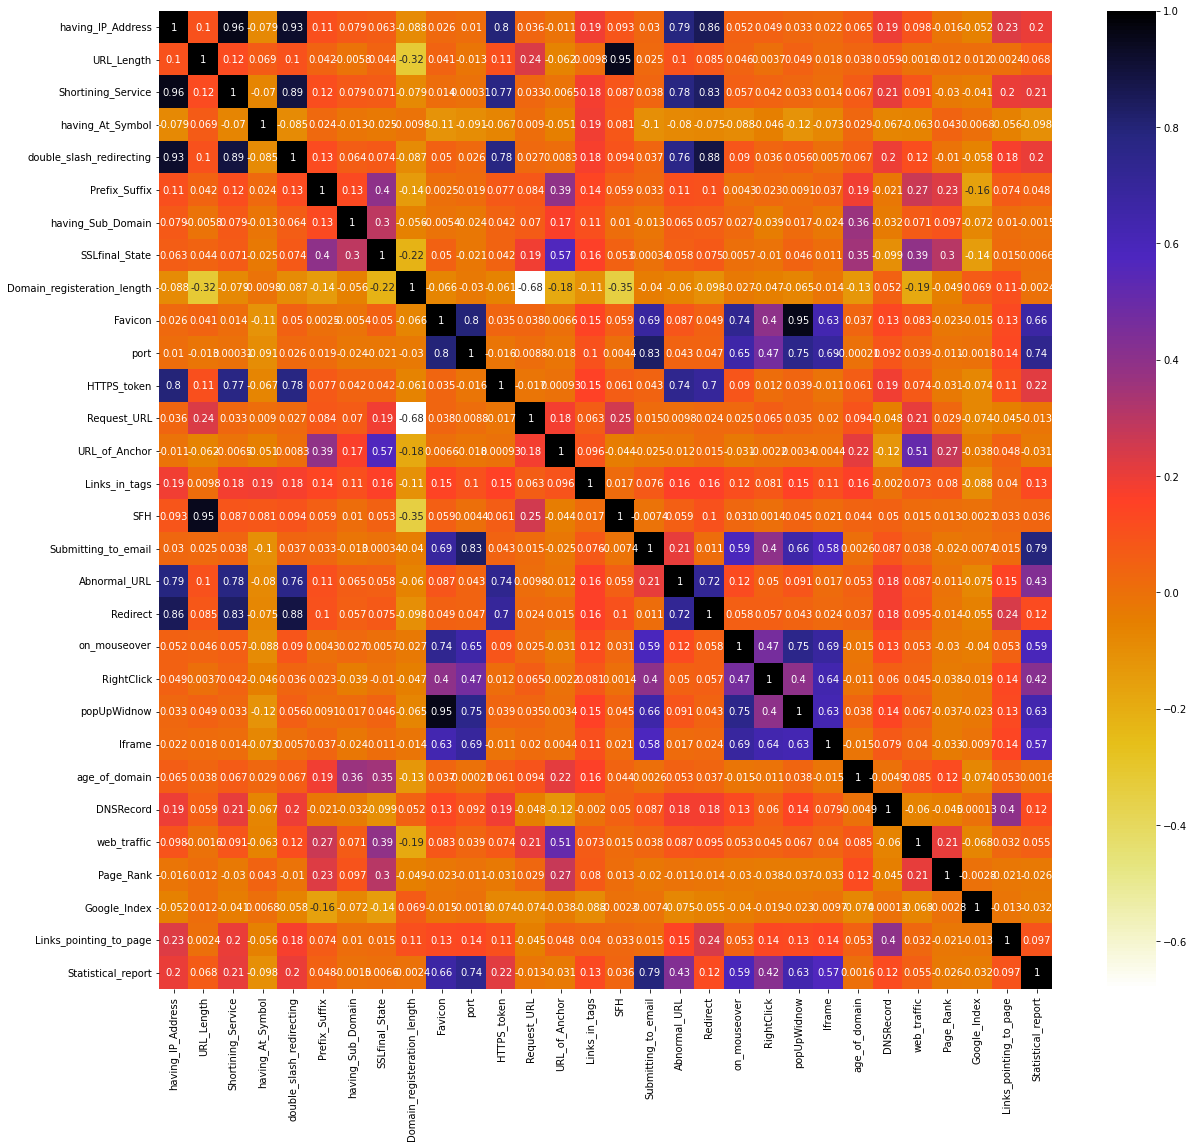

In [41]:
plt.figure(figsize=(20,18))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Creating a function which will return the highly correlated features on the basis of given threshold value 

In [42]:
def correlation(dataset, threshold):
  col_corr = set()  #set of all names of correlated columns , we've created set so that duplicate entries will not go in the set
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]  #getting name of column
        col_corr.add(colname)
  return col_corr

In [43]:
cor_features = correlation(x_train,0.7)
cor_features

{'Abnormal_URL',
 'HTTPS_token',
 'Redirect',
 'SFH',
 'Shortining_Service',
 'Statistical_report',
 'Submitting_to_email',
 'double_slash_redirecting',
 'on_mouseover',
 'popUpWidnow',
 'port'}

In [44]:
len(cor_features)

11

# Removing the correlated features to increase the model's accuracy

In [45]:
x_train.drop(cor_features,axis=1,inplace=True)
x_test.drop(cor_features,axis=1,inplace=True)

In [46]:
print(x_train.shape)
print(x_test.shape)

(1201, 19)
(515, 19)


# As the given problem is a classification problem we will use different classification models and check which model gives the highest accuracy






# Random forest classifier



In [89]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9436893203883495

In [90]:
pred1 = rf.predict(x_test)

# Logistic regression

In [77]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.9320388349514563

In [79]:
pred2 = log_reg.predict(x_test)

# K Nearest Neighbors(KNN)


*   In this algorithm we need to specify the value of neighbors(k) and for that here I have created a function which will compute the accuracy of the model for the different values of neighbors(k)  



In [80]:
accuracy = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(knn, x_train,y_train, cv=10)
  accuracy.append(score.mean())

Text(0, 0.5, 'Accuracy')

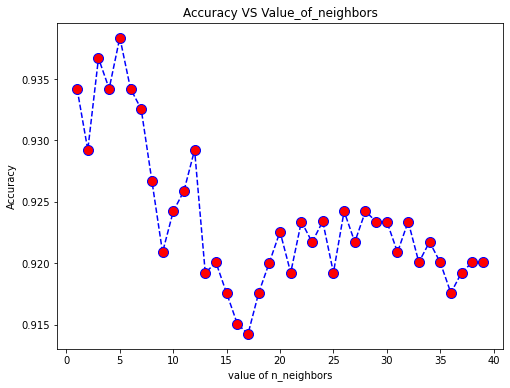

In [81]:
plt.figure(figsize=(8,6))
plt.plot(range(1,40),accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy VS Value_of_neighbors')
plt.xlabel('value of n_neighbors')
plt.ylabel('Accuracy')

# From above graph we can conclude that at neighbors=5 the model gives highest accuracy

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9514563106796117

In [84]:
pred3 = knn.predict(x_test)

# Creating a function which will give the confusion matrix of the specified model

In [85]:
def conf_matrix(pred):
  cm = confusion_matrix(y_test,pred)
  print(cm)
  sns.heatmap(cm, annot=True)

[[259  14]
 [ 15 227]]


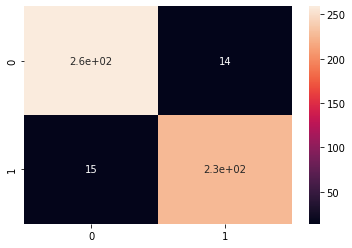

In [91]:
conf_matrix(pred1)          # Confusion matrix of random forest classifier model

[[262  11]
 [ 24 218]]


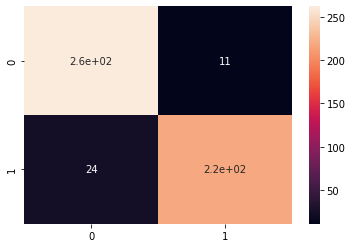

In [87]:
conf_matrix(pred2)                        # Confusion matrix of logistic regression model

[[266   7]
 [ 18 224]]


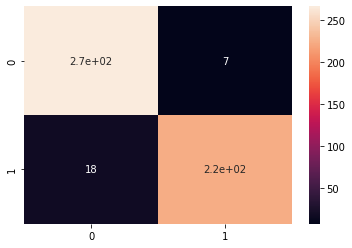

In [88]:
conf_matrix(pred3)                           # Confusion matrix of KNN model

# Conclusion: KNN gives the highest accuracy from all the three models 

*   Classification report of KNN model is as follows:




In [92]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       273
           1       0.97      0.93      0.95       242

    accuracy                           0.95       515
   macro avg       0.95      0.95      0.95       515
weighted avg       0.95      0.95      0.95       515

